In [4]:
import os
import matplotlib.pyplot as plt

In [5]:
directory_path = '/data/ephemeral/home/train/images'
directory = os.listdir(directory_path)

In [26]:
def analyze_folder_names(directory):
    genders = {"female": 0, "male": 0}
    ages_by_10 = {"0-19": 0, "20-29": 0, "30-39": 0, "40-49": 0, "50-59": 0, "60~": 0}
    ages_by_5 = {"0-15": 0, "16-19": 0, "20-25": 0, "26-29": 0, "30-35": 0, "36-39": 0, "40-45": 0, "46-49": 0, "50-55": 0, "56-59": 0, "60~": 0}
    ages_by_3 = {"0-13": 0, "14-16": 0, "17-19": 0, "20-23": 0, "24-26": 0, "27-29": 0, "30-33": 0, "34-36": 0, "37-39": 0, "40-43": 0, "44-46": 0, "47-49": 0, "50-53": 0, "54-56": 0, "57-59": 0, "60~": 0}
    directory_cnt = 0
    
    for folder_name in directory:
        if folder_name.startswith('.'):
            continue
        directory_cnt += 1
        
        parts = folder_name.split('_')
        if len(parts) == 4:
            idx, gender, race, age = parts
            genders[gender] += 1
            
            if age < '20':
                ages_by_10['0-19'] += 1
                if age > '15':
                    ages_by_5['16-19'] += 1
                else:
                    ages_by_5['10-15'] += 1
                if age > '16':
                    ages_by_3['17-19'] += 1
                elif age > '13':
                    ages_by_3['14-16'] += 1
                else:
                    ages_by_3['0-13'] += 1
            elif age < '30':
                ages_by_10['20-29'] += 1
                if age > '25':
                    ages_by_5['26-29'] += 1
                else:
                    ages_by_5['20-25'] += 1
                if age > '26':
                    ages_by_3['27-29'] += 1
                elif age > '23':
                    ages_by_3['24-26'] += 1
                else:
                    ages_by_3['20-23'] += 1
            elif age < '40':
                ages_by_10['30-39'] += 1
                if age > '35':
                    ages_by_5['36-39'] += 1
                else:
                    ages_by_5['30-35'] += 1
                if age > '36':
                    ages_by_3['37-39'] += 1
                elif age > '33':
                    ages_by_3['34-36'] += 1
                else:
                    ages_by_3['30-33'] += 1
            elif age < '50':
                ages_by_10['40-49'] += 1
                if age > '45':
                    ages_by_5['46-49'] += 1
                else:
                    ages_by_5['40-45'] += 1
                if age > '46':
                    ages_by_3['47-49'] += 1
                elif age > '43':
                    ages_by_3['44-46'] += 1
                else:
                    ages_by_3['40-43'] += 1
            elif age < '60':
                ages_by_10['50-59'] += 1
                if age > '55':
                    ages_by_5['56-59'] += 1
                else:
                    ages_by_5['50-55'] += 1
                if age > '56':
                    ages_by_3['57-59'] += 1
                elif age > '53':
                    ages_by_3['54-56'] += 1
                else:
                    ages_by_3['50-53'] += 1
            else:
                ages_by_10['60~'] += 1
                ages_by_5['60~'] += 1
                ages_by_3['60~'] += 1

    print("directory count: ", directory_cnt)
    
    return genders, ages_by_10, ages_by_5, ages_by_3

In [27]:
gender_distribution, age_distribution_by_10, age_distribution_by_5 ,age_distribution_by_3 = analyze_folder_names(directory)

age_groups_by_10 = list(age_distribution_by_10.keys())
age_counts_by_10 = list(age_distribution_by_10.values())

age_groups_by_5 = list(age_distribution_by_5.keys())
age_counts_by_5 = list(age_distribution_by_5.values())

age_groups_by_3 = list(age_distribution_by_3.keys())
age_counts_by_3 = list(age_distribution_by_3.values())

gender_groups = list(gender_distribution.keys())
gender_counts = list(gender_distribution.values())

directory count:  2700


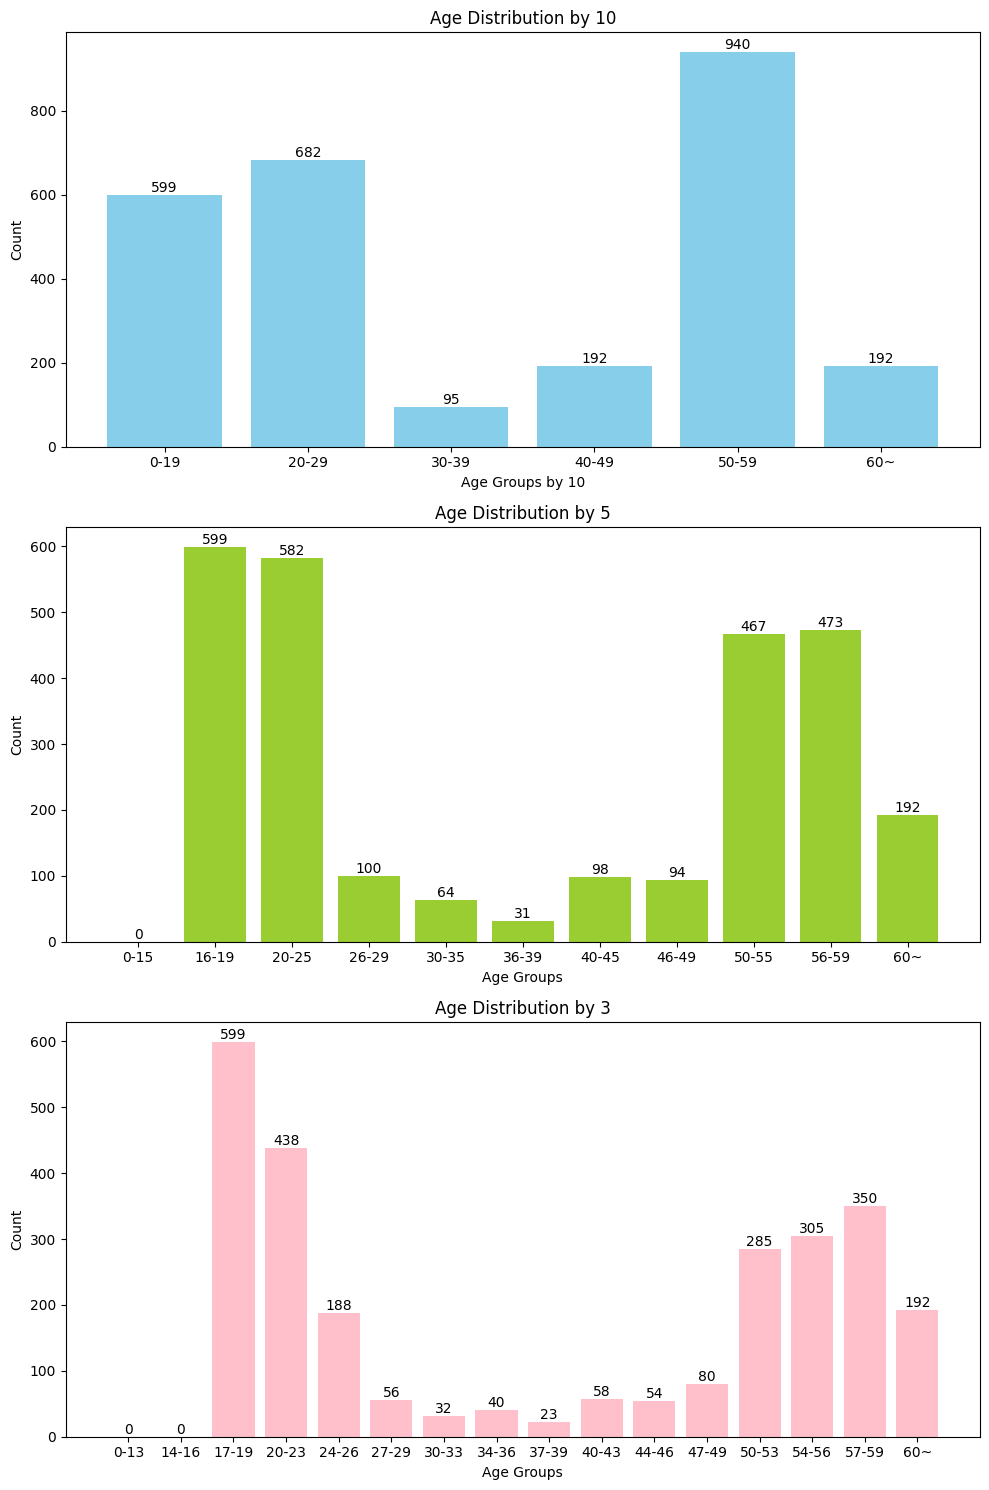

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

axes[0].bar(age_groups_by_10, age_counts_by_10, color='skyblue')
axes[0].set_title('Age Distribution by 10')
axes[0].set_xlabel('Age Groups by 10')
axes[0].set_ylabel('Count')

axes[1].bar(age_groups_by_5, age_counts_by_5, color='yellowgreen')
axes[1].set_title('Age Distribution by 5')
axes[1].set_xlabel('Age Groups')
axes[1].set_ylabel('Count')

axes[2].bar(age_groups_by_3, age_counts_by_3, color='pink')
axes[2].set_title('Age Distribution by 3')
axes[2].set_xlabel('Age Groups')
axes[2].set_ylabel('Count')

for i in range(len(age_groups_by_10)):
    axes[0].text(i, age_counts_by_10[i], age_counts_by_10[i], ha='center', va='bottom')

for i in range(len(age_groups_by_5)):
    axes[1].text(i, age_counts_by_5[i], age_counts_by_5[i], ha='center', va='bottom')

for i in range(len(age_groups_by_3)):
    axes[2].text(i, age_counts_by_3[i], age_counts_by_3[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()

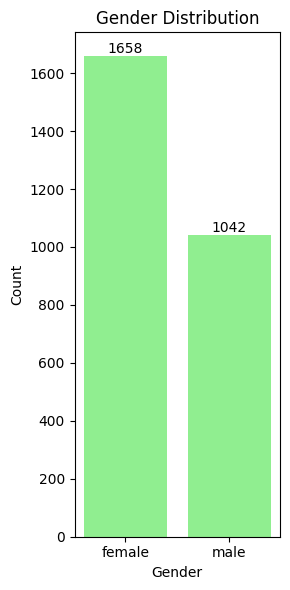

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 6))

axes.bar(gender_groups, gender_counts, color='lightgreen')
axes.set_title('Gender Distribution')
axes.set_xlabel('Gender')
axes.set_ylabel('Count')

for i, count in enumerate(gender_counts):
    axes.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns